In [1]:
import pandas as pd
orders = pd.read_csv('Orders.csv')
returns = pd.read_csv('Returns.csv')

In [2]:
orders
orders['OrderDate'] = orders['Order.Date']

In [3]:
orders = orders.drop(['Order.Date'], axis = 1)

In [4]:
from matplotlib import pyplot as plt
plt.style.use('ggplot')
orders.OrderDate.dtype
orders['OrderDate']= pd.to_datetime(orders['OrderDate'])

In [5]:
orders['Year'] = orders['OrderDate'].map(lambda x:x.year)

In [6]:
orders['Month'] = orders['OrderDate'].map(lambda x: x.month)

In [7]:
orders['Profit'] = orders['Profit'].str.replace('[$,]', '')
orders['Sales'] = orders['Sales'].str.replace('[$,]', '')


In [8]:
orders['Profit'] = pd.to_numeric(orders['Profit'])
orders['Sales'] = pd.to_numeric(orders['Sales'])
orders.head()

,Row.ID,Order.ID,Ship.Date,Ship.Mode,Customer.ID,Customer.Name,Segment,Postal.Code,City,State,...,Product.Name,Sales,Quantity,Discount,Profit,Shipping.Cost,Order.Priority,OrderDate,Year,Month
0,40098,CA-2014-AB10015140-41954,11/13/14,First Class,AB-100151402,Aaron Bergman,Consumer,73120.0,Oklahoma City,Oklahoma,...,Samsung Convoy 3,221.98,2,0.0,62.15,40.77,High,2014-11-11,2014,11
1,26341,IN-2014-JR162107-41675,2/7/14,Second Class,JR-162107,Justin Ritter,Corporate,NaN,Wollongong,New South Wales,...,"Novimex Executive Leather Armchair, Black",3709.40,9,0.1,-288.77,923.63,Critical,2014-02-05,2014,2
2,25330,IN-2014-CR127307-41929,10/18/14,First Class,CR-127307,Craig Reiter,Consumer,NaN,Brisbane,Queensland,...,"Nokia Smart Phone, with Caller ID",5175.17,9,0.1,919.97,915.49,Medium,2014-10-17,2014,10
3,13524,ES-2014-KM1637548-41667,1/30/14,First Class,KM-1637548,Katherine Murray,Home Office,NaN,Berlin,Berlin,...,"Motorola Smart Phone, Cordless",2892.51,5,0.1,-96.54,910.16,Medium,2014-01-28,2014,1
4,47221,SG-2014-RH9495111-41948,11/6/14,Same Day,RH-9495111,Rick Hansen,Consumer,NaN,Dakar,Dakar,...,"Sharp Wireless Fax, High-Speed",2832.96,8,0.0,311.52,903.04,Critical,2014-11-05,2014,11


In [9]:
df_date = orders.copy()

In [10]:
df_date.set_index('OrderDate', inplace=True)

In [11]:
df_date1 = df_date[['Quantity']]

In [12]:
df_date1.head()

,Quantity
OrderDate,
2014-11-11,2
2014-02-05,9
2014-10-17,9
2014-01-28,5
2014-11-05,8


Text(0,0.5,'Quantity')

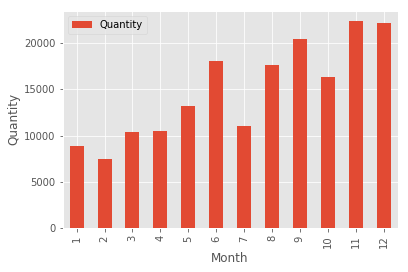

In [13]:
df_date1.groupby(df_date1.index.month).sum().plot.bar()
plt.xlabel('Month')
plt.ylabel('Quantity')

In [25]:
df = df_date
df['Month'] = df.index.month
df1 = df[['Quantity','Category', 'Month']]


C:\Users\rajes\Anaconda4\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


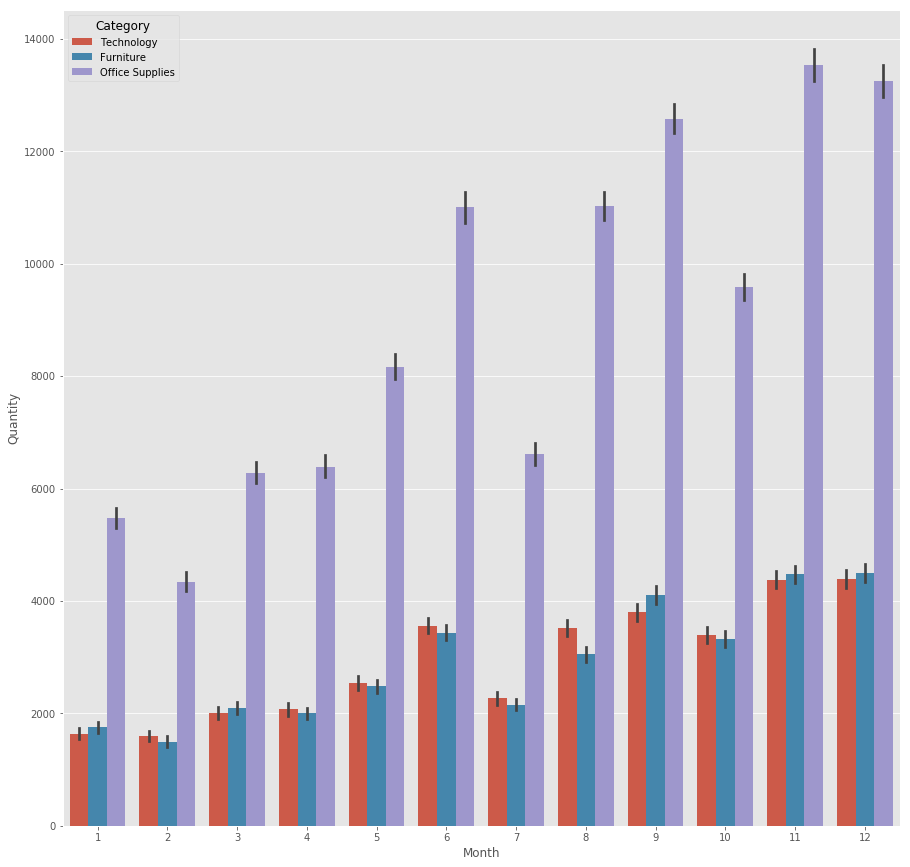

In [27]:
import seaborn as sns
plt.figure(figsize = (15,15))
sns.barplot(x='Month',y='Quantity', hue='Category', data=df1, estimator = sum)